# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é visualizar a matriz de pesos do classificador
dos dígitos do MNIST e visualizar a matriz do gradiente destes pesos
para observar a sua convergência observando a formação da matriz de pesos
enquanto que o gradiente diminui a cada iteração.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Acessando o dataset MNIST

O dataset MNIST é o dataset "hello world" do deep learning, criado por LeCun.
 Estamos usando aqui uma
versão menor com 20 mil amostras disponibilizados pelo próprio Colab.

A matriz tem 19999 linhas e 785 colunas, sendo que a primeira coluna é a classe
do caractere, de 0 a 9 e as 784 colunas restantes contém o raster unidimensional
da imagem 32x32 de valores entre 0 e 255.

In [ ]:
xy = np.array(pd.read_csv('sample_data/mnist_train_small.csv'))

In [ ]:
x_raw = xy[:,1:] # shape (19999,784) dtype int64
y_raw = xy[:,0 ] # shape (19999,)   dtype int64
x_raw.shape, y_raw.shape

((19999, 784), (19999,))

### Carregamento, normalização e seleção dos dados do MNIST


In [ ]:
x_train = torch.FloatTensor(x_raw / 255.)
y_train = torch.LongTensor(y_raw)

print("\nDimensões dos dados das imagens:   ", x_train.shape)
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", x_train.dtype)
print("Tipo das classes das imagens:      ", y_train.dtype)


Dimensões dos dados das imagens:    torch.Size([19999, 784])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         torch.float32
Tipo das classes das imagens:       torch.int64


### Visualizando os dados

In [ ]:
def to_pil(img):
    return torchvision.transforms.functional.to_pil_image(img, mode=None)

## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

## Treinamento

### Inicialização dos parâmetros

In [ ]:
epochs = 100
learningRate = 0.8

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos pesos

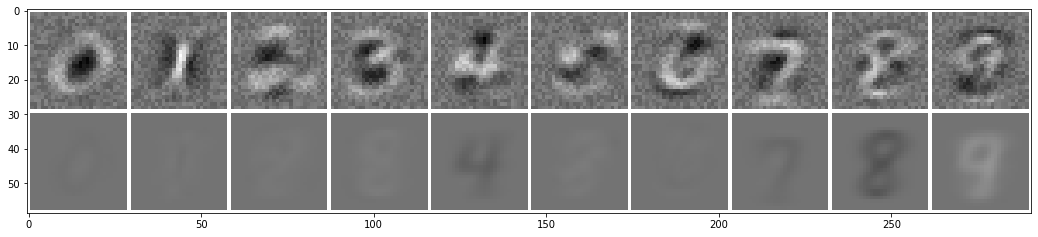

In [ ]:
from IPython import display
a = 5
j = 0
losses = []
fig = plt.figure(figsize=(18, 6))

try:
    for i in range(epochs):
        # Predict da rede
        outputs = model(x_train)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        if i > 0:
            optimizer.step()
            losses.e(loss.data.item())
        
        wv = model.weight.data.reshape(10,28,28).unsqueeze(1)
        wg = model.weight.grad.data.reshape(10,28,28).unsqueeze(1)
        wc = torch.cat((wv,wg),0)
        wc -= wc.min()
        wc /= wc.max()
        grid = torchvision.utils.make_grid(wc, nrow=10, pad_value=1.0, padding=1)
        plt.imshow(grid.numpy().transpose(1, 2, 0))

        display.display(fig)
        display.clear_output(wait=True)
        input(j)
except KeyboardInterrupt:
    pass

In [ ]:
print('Final loss:', loss.data[0])

### Visualizando gráfico de perda durante o treinamento

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)
    
    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

<img src="../figures/RegressaoSoftmaxArgmaxNMIST.png",width = 400>

# Atividades

## Exercícios

- 1) Na configuração da figura acima, mostre os valores de z0 até z9, os valores das probabilidades y_hat, após o softmax, quando a rede recebe como entrada a nona amostra que contém o manuscrito do dígito '4':

In [ ]:
image  = x_train[9]
target = y_train[9]

plt.imshow(image.numpy().reshape(28,28), cmap='gray')
print('class:', target)

- 2) Insira código no laço do treinamento para que no final de cada época, 
     seja impresso: o número da época e a perda e a acurácia

- 3) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

# Aprendizados
